### Loading the iris dataset into scikit learn

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.data[1])

[4.9 3.  1.4 0.2]


### Machine Learning Terminology
- Each row is an observation (also known as: sample, example, instance, record)
- Each colummn is a feature (also known as: predictor, attribute, independent variable, input, regressor, covariate)


In [4]:
print(iris.feature_names) #This prints the columns names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.target) #This represents what we are going to predict

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(iris.target_names) 

['setosa' 'versicolor' 'virginica']


- Each value we are predicting is the response (also known as: target, outcome, label, dependent variable)
- Classification is supervised learning in which the response is categorical
- Regression is supervised learning in which the responce is ordered and continuos 

### Requirements for working with data in scikit-learn
1. Features and response are seperate objects
2. Features and response should be numeric
3. Features and respose should be NumPy arrays
4. Features and response should have specific shapes

In [7]:
#Check the types of the features and response
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
print(iris.data.shape) #Should contain number of observation and number of features

(150, 4)


In [9]:
print(iris.target.shape)

(150,)


In [10]:
X = iris.data #Feature variable as 'X'

y = iris.target #Response vector 'y'

### KNN Classification models

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the KNN as the predicted response value for the unknown iris

In [11]:
print(X.shape)
print(y.shape)
#We can verify that X and y have appropriate shapes

(150, 4)
(150,)


#### Scikit-learn 4 step modeling pattern
**Step 1:** Import the class you plan to use

In [12]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [13]:
knn = KNeighborsClassifier(n_neighbors = 1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [14]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


**Step 3:** Fit the model with data (aka "Model Training")

- Model is learning the relationship between X and y
- Occurs in-place

In [15]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Use the information it learned during the model training process

In [16]:
knn.predict([[3,4,5,2]])
#Returns a Numpy array

array([2])

In [17]:
X_new = [[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

array([2, 1])

#### Using a different value for K

In [18]:
#This is known as model tuning
#We need not to import the class again

knn = KNeighborsClassifier(n_neighbors= 5)

#Fit the model with data
knn.fit(X, y)

#Predict the response for new observation
knn.predict(X_new)

array([1, 1])

### Using a different Classification model

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X, y)

logreg.predict(X_new)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0])

### Comparing machine learning models in scikit-learn

#### Evaluation procedure 1: Train and test on the entire dataset
1. Train the model on the entire dataset
2. Test the model on the same dataset, and evaluate how well we did by comparing the predicted response values with the true response values.

In [20]:
logreg.fit(X, y)

logreg.predict(X)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
y_pred = logreg.predict(X)

len(y_pred)

150

Classfication accuracy:

- Proportion of correct predictions
- Common evaluation metric for classification problems

In [22]:
#Computing classification accuracy for the logitic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred)) #true response values and predicted response values
#This is known as training accuracy
#We have trained and tested the model on the same data

0.9733333333333334


### KNN (k=5)


In [23]:
knn = KNeighborsClassifier(n_neighbors= 5)

#Fit the model with data
knn.fit(X, y)

#Predict the response for new observation
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


### KNN (k=1)

In [24]:
knn = KNeighborsClassifier(n_neighbors= 1)

#Fit the model with data
knn.fit(X, y)

#Predict the response for new observation
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


#### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on out-of-sample data
- But, maximizing training accuracy rewards overly complex models that won't necessarily generalize
- Unnecessarily complex models overfit the training data

#### Evaluation procedure 2: Train/Test split

1. Split the dataset into two pieces: a training set and a testing set
2. Train the model on the training set.
3. Test the model on the testing set, and evaluate how well we did.

In [25]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [26]:
#Step 1: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4 )

What did this accomplish?

- Model can be trained and tested on different data
- Response values are known for the training set, and thus predictions can be evaluated
- Testing accuracy is a better estimate than training accuracy of out-of-sample performance

In [27]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [28]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [29]:
#Step 2: Train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [31]:
#Let's repeat the same for k=1 and k=5
knn = KNeighborsClassifier(n_neighbors= 5)

#Fit the model with data
knn.fit(X_train, y_train)

#Predict the response for new observation
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [32]:
knn = KNeighborsClassifier(n_neighbors= 1)

#Fit the model with data
knn.fit(X_train, y_train)

#Predict the response for new observation
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


#### Can we locate an even better value for K?

In [33]:
#Trying k = 1 through k = 25 and record testing accuracy
k_range = range(1,26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing accuracy')

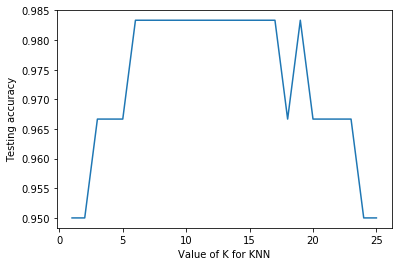

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')

- Training accuracy rises as model complexity increases
- Testing accuracy penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the value of K (lower value = more complex)


### Making predictions on out-of-sample data


In [35]:
knn = KNeighborsClassifier(n_neighbors= 11)

knn.fit(X, y)

knn.predict([[3, 5, 4, 2]])

array([1])

#### Downsides of train/split?

- Provides a high-variance estimate of out-of-sample accuracy
- K-fold cross-validation overcomes this limitation
- But, train/test split is still useful because of its flexibility and speed

### Data Science Pipeline: Pandas, Seaborn, Scikit-Learn

#### Types of supervised learning

- Classification: Predict a categorical response
- Regression: Predict a continuous response

In [36]:
import pandas as pd

In [44]:
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/1a20cab8fedf814e83b4b75cae81a28a79cd3753/data/Advertising.csv")

data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
data.set_index("Unnamed: 0", inplace = True)
data.head()

,TV,Radio,Newspaper,Sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary Object Types:

- DataFrame: rows and columns (like a spreadsheet)
- Series: a single column


In [46]:
data.tail()

,TV,Radio,Newspaper,Sales
Unnamed: 0,,,,
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [47]:
data.shape

(200, 4)

#### What are the features?

- TV: Advertising dollars on TV for a single product in a given market
- Radio: Advertising dollars spend on Radio
- Newspaper: Advertising dollars spent on Radio

#### What is the response?

- Sales: sales of a single product in a given market (in thousands of items)

What else do we know?

- Because the response variable is continuos, this is a regression problem
- There are 200 observations

In [48]:
import seaborn as sns

%matplotlib inline

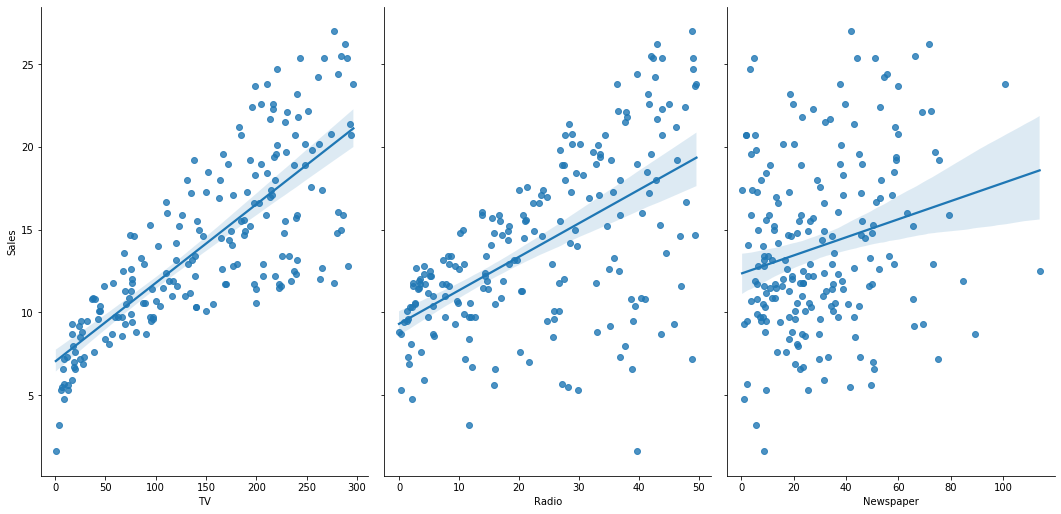

In [52]:
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', height = 7, aspect = 0.7, kind = 'reg')

### Linear Regression

- Pros: Fast, no tuning required, highly interpretable, well-understoon
- Cons: Unlikely to produce the best predictive accuracy 


In [53]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]

X.head()

,TV,Radio,Newspaper
Unnamed: 0,,,
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [55]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [56]:
y = data['Sales']

y.head()

Unnamed: 0
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [58]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


### Split X and y into training and testing sets

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [62]:
#Let's check the shape of the sets
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(150, 3)
(50, 3)
(50,)
(150,)


### Linear regression in Scikit_learn

In [63]:
#Import model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()


linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Interpretting model coefficients

In [64]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [66]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

#### y = 2.88 + 0.0466 x TV + 0.179 x Radio + 0.00345 x Newspaper

How do we interpret the TV coefficient (0.0466)?

- For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales

- Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

If an increase in TV ad spending was associated with a decrease in sales, coefficient will be negative.

### Making Predictions

In [67]:
y_pred = linreg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values!

### Model Evaluation Metrics for regression

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuos values.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems.

In [68]:
#Define True and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [69]:
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


In [70]:
print(metrics.mean_squared_error(true, pred))

150.0


In [75]:
import numpy as np

np.sqrt(metrics.mean_squared_error(true, pred))

12.24744871391589

In [76]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.4046514230328955

### Feature Selection

Does Newspaper 'belong' in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [77]:
feature_cols = ['TV', 'Radio']

X = data[feature_cols]

y = data.Sales


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

linreg.fit(X_train, y_train)


y_pred = linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.3879034699382888

#### The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.